In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import kdeplot
import subprocess

In [6]:
def acquire():
    acq=pd.read_csv('/Users/almu/ironhack/datamad0119/module-1/pipelines-project/your-code/data-folder/googleplaystore.csv')
    return acq

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


email enviado


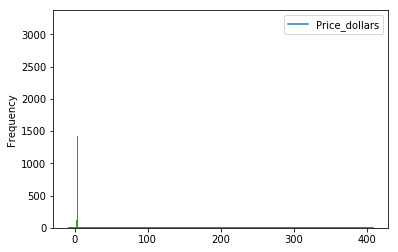

In [7]:
def wrangle(acq):
    
    data = acq.drop_duplicates()
    data.drop_duplicates('App', keep="last", inplace=True)
    data=data.rename(columns={'Price':'Price_dollars','Content Rating':'Content_Rating', 'Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'})
    data=data.drop('Genres', axis=1)
    new = data['Last_Updated'].str.split(",", n = 1, expand = True)
    data['Updating_Year']=new[1]
    data=data.drop('Last_Updated', axis=1)
    data['Installs']=data['Installs'].str.replace("+","")
    data['Android_Ver']=data['Android_Ver'].str.replace(" and up","")
    data['Price_dollars']=data['Price_dollars'].str.replace("$","")
    data=data.drop(data[data['Reviews']=='3.0M'].index)
    data.loc[:,'Installs'] = data.loc[:,'Installs'].str.replace(',', '', regex=False).astype(int)
    data['Reviews']=data['Reviews'].astype(int)
    data['Updating_Year']=data['Updating_Year'].astype(int)
    data['Price_dollars']=data['Price_dollars'].astype(float)
    return data


def analyze1 (data):
    H1=pd.pivot_table(data,values=['Reviews','Installs'], index='Type',aggfunc={'Reviews':'mean', 'Installs':'mean'})
    H2=pd.pivot_table(data,values=['Installs'], index='Category',aggfunc='sum')
    H2=H2.sort_values(by='Installs', ascending=False)
    H2=H2.head(2)
    correlation=data['Installs'].corr(data['Updating_Year'])
    correlation
    H4=data[(data['Reviews']>50000000)&(data['Type']=='Free')].sort_values(by='Rating', ascending=False).head(3)
    H4
    bins = [0, 1, 2,3,4,5]
    data['binned'] = pd.cut(data['Rating'],bins)
    H5=pd.pivot_table(data,values='App', index='binned',columns='Type',aggfunc='count').sort_values(by=('Free'), ascending=False).sort_values(by=('Paid'), ascending=False).head(5)
    H5
    correlation=data['Price_dollars'].corr(data['Rating'])
    correlation
    data['Price_dollars'].describe()
    return (H1,H2,correlation,H4,H5)

def visualize1 (data):
    return kdeplot(data.Price_dollars)

def visualize2 (data):
    data2=data[(data['Type']=='Paid')]
    data3=data[(data['Type']=='Free')]
    return (data2['Rating'].plot.hist(),data3['Rating'].plot.hist())
    
def report_to():
    msg = " The report has been generated. "
    command = 'echo {} | mail -s "email subject" "gonzalezsalcedoa@gmail.com"'.format(msg)
    subprocess.Popen(command, shell=True)
    return('email enviado') 
    
if __name__ == '__main__':
    acq = acquire()
    data = wrangle(acq)
    results=analyze1 (data)
    graph1=visualize1 (data)
    graph2_3=visualize2 (data)

reporting=report_to()
print(reporting)



